In [2]:
# Import the modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from joblib import dump

In [3]:
#  Import and read the charity_data.csv.
insurance_raw_df = pd.read_csv("./resources/insurance_dataset.csv")
insurance_raw_df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.30767
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.89922
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.47630
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.02984
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.30984


In [4]:
# Filter by region "northwest" to reduce the size of data
insurance_df = insurance_raw_df.loc[insurance_raw_df["region"] == 'northwest']
insurance_df.drop(columns='region')

,age,gender,bmi,children,smoker,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
1,25,female,25.38,2,yes,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899220
3,25,male,19.89,0,no,None,Diabetes,Rarely,White collar,Standard,11789.029840
4,49,male,38.21,3,yes,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309840
10,21,male,42.08,1,yes,None,Diabetes,Rarely,Student,Premium,18996.131560
11,45,female,39.68,1,no,High blood pressure,High blood pressure,Occasionally,Blue collar,Premium,14892.145930
...,...,...,...,...,...,...,...,...,...,...,...
999979,52,female,18.56,0,yes,Heart disease,High blood pressure,Occasionally,White collar,Standard,20023.506850
999983,53,female,23.27,5,yes,Heart disease,Diabetes,Occasionally,Unemployed,Standard,20126.797160
999985,60,male,37.00,4,no,High blood pressure,Heart disease,Occasionally,White collar,Standard,18098.555840
999987,45,female,28.36,1,no,Diabetes,High blood pressure,Never,Student,Basic,8089.419329


In [5]:
insurance_df.nunique()

age                           48
gender                         2
bmi                         3201
children                       6
smoker                         2
region                         1
medical_history                4
family_medical_history         4
exercise_frequency             4
occupation                     4
coverage_level                 3
charges                   249913
dtype: int64

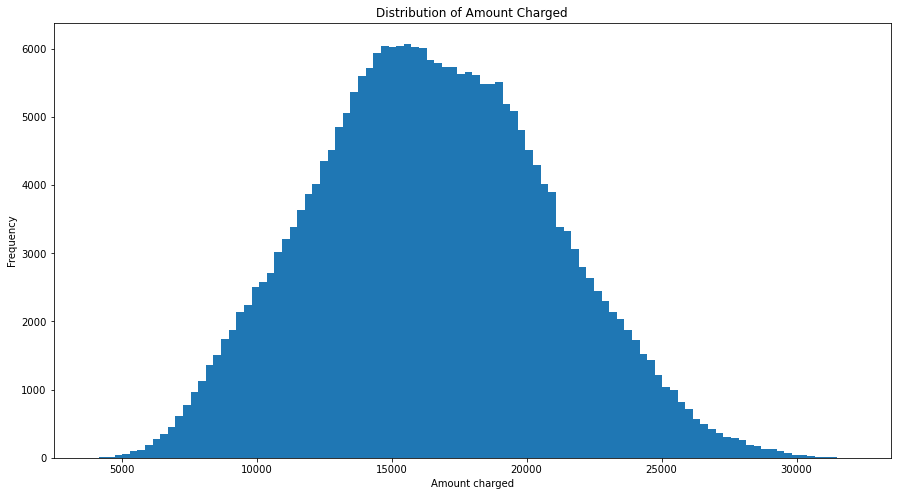

In [6]:
# Set figure size
plt.figure(figsize=(15, 8))

# Histogram of the "charges" variable to identify outliers, skewness or potential clusters in the data. 
# Result shows the curve is moderately right-skewed

plt.hist(insurance_df["charges"], bins=100)
plt.xlabel("Amount charged")
plt.ylabel("Frequency")
plt.title("Distribution of Amount Charged")
plt.show()

In [7]:
# Calculate the mean and standard deviation of the "charges" variable
charges_mean = insurance_df["charges"].mean()
charges_std = insurance_df["charges"].std()

# Print the mean and standard deviation
print("Mean charges: ", charges_mean)
print("Standard deviation of charges: ", charges_std)

Mean charges:  16528.657529353088
Standard deviation of charges:  4400.753008145409


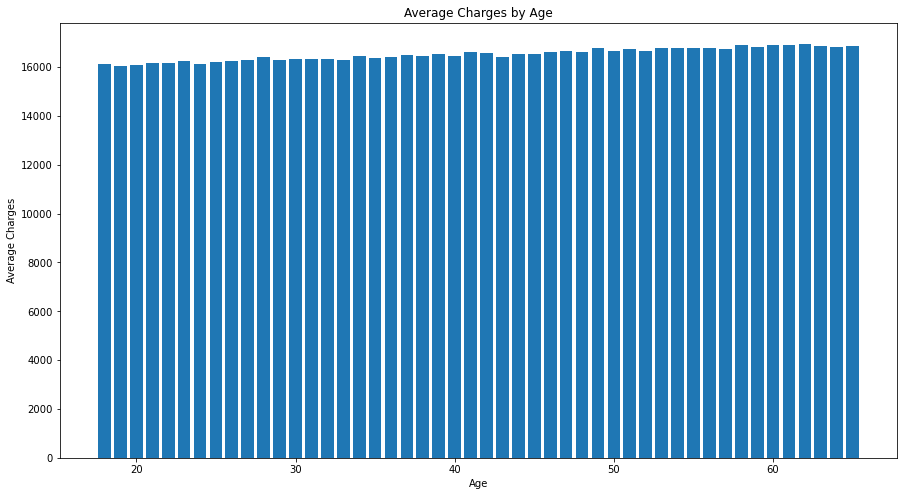

In [8]:
# Bar Graph of Age vs Charges

# Calculate the average charges by age group
avg_charges_by_age = insurance_df.groupby("age")["charges"].mean()

# Set figure size
plt.figure(figsize=(15, 8))

# Plot a bar graph of the average charges by age group
# result show similar charges for all age groups
plt.bar(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.title("Average Charges by Age")
plt.show()

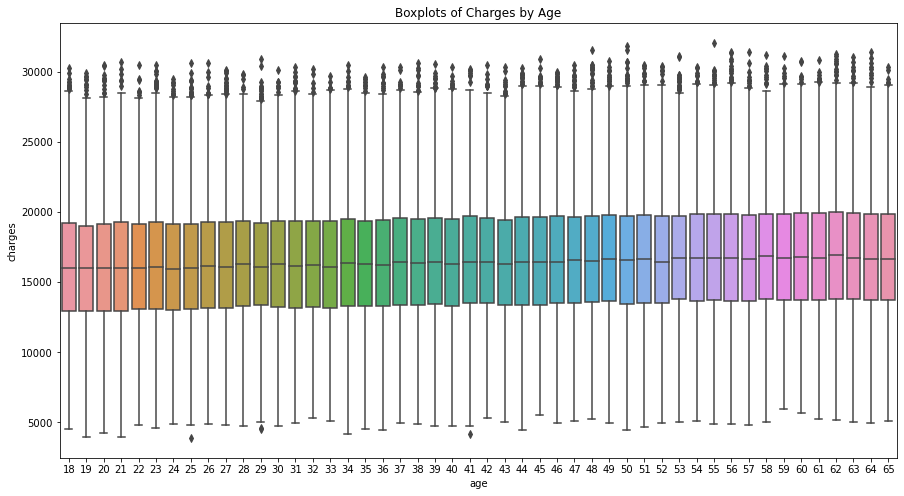

In [9]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots of charges for different age groups
# result shows a normal distribution
sns.boxplot(x="age", y="charges", data=insurance_df)
plt.title("Boxplots of Charges by Age")
plt.show()


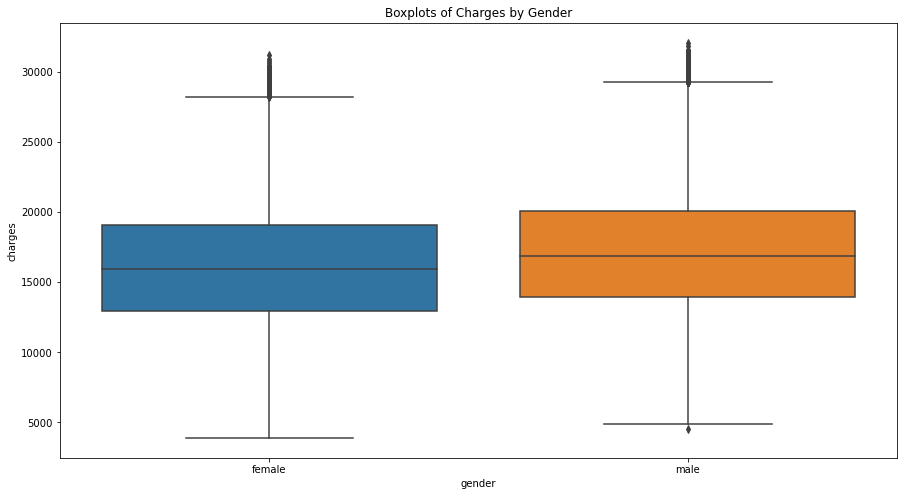

In [10]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots of charges for different genders
# results show males slightly higher than female
sns.boxplot(x="gender", y="charges", data=insurance_df)
plt.title("Boxplots of Charges by Gender")
plt.show()

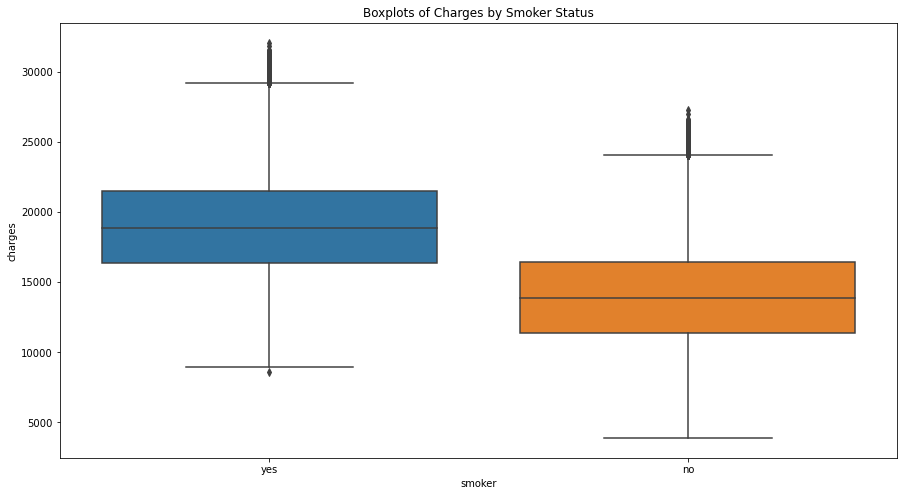

In [11]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots of charges for different smoker status
# as expected smokers get charged more
sns.boxplot(x="smoker", y="charges", data=insurance_df)
plt.title("Boxplots of Charges by Smoker Status")
plt.show()

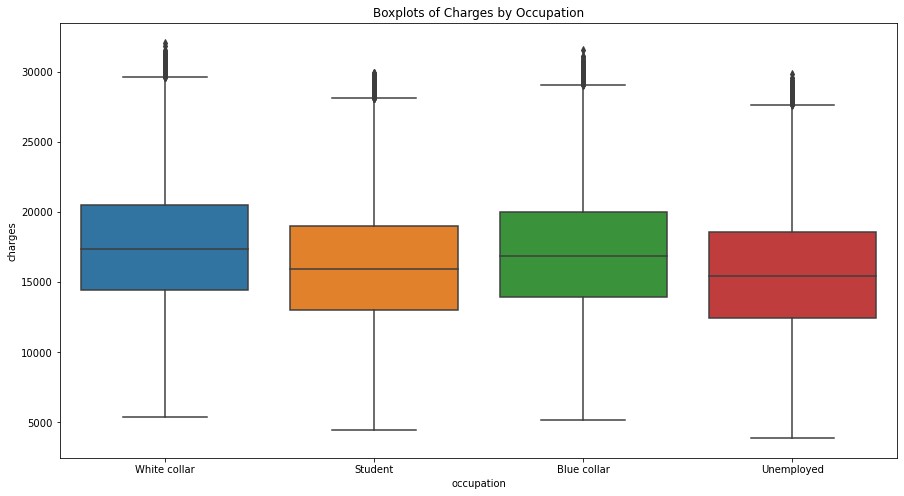

In [12]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots of charges for different occupations
# interesting that white collar gets charged more than blue collar 
sns.boxplot(x="occupation", y="charges", data=insurance_df)
plt.title("Boxplots of Charges by Occupation")
plt.show()

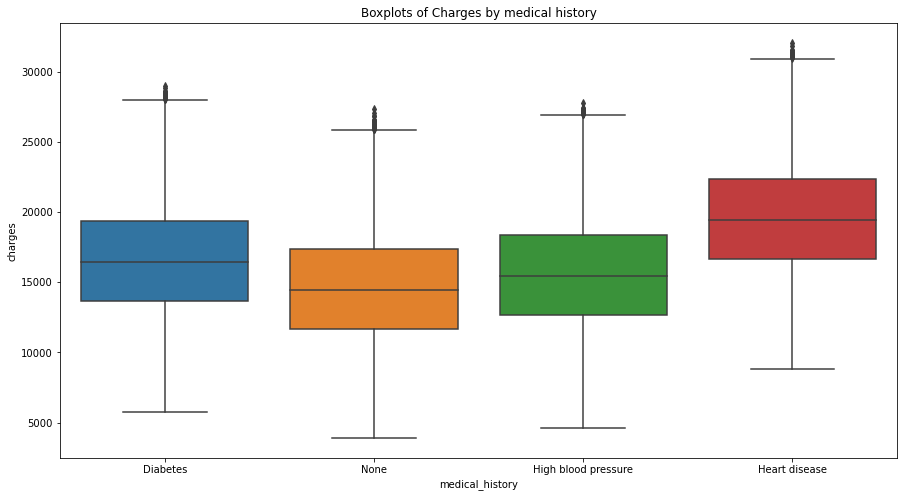

In [13]:
# Set figure size
plt.figure(figsize=(15, 8))

# Boxplot of charges as result of medical history
# heart disease and diabetes get charged the most
sns.boxplot(x="medical_history", y="charges", data=insurance_df)
plt.title("Boxplots of Charges by medical history")
plt.show()

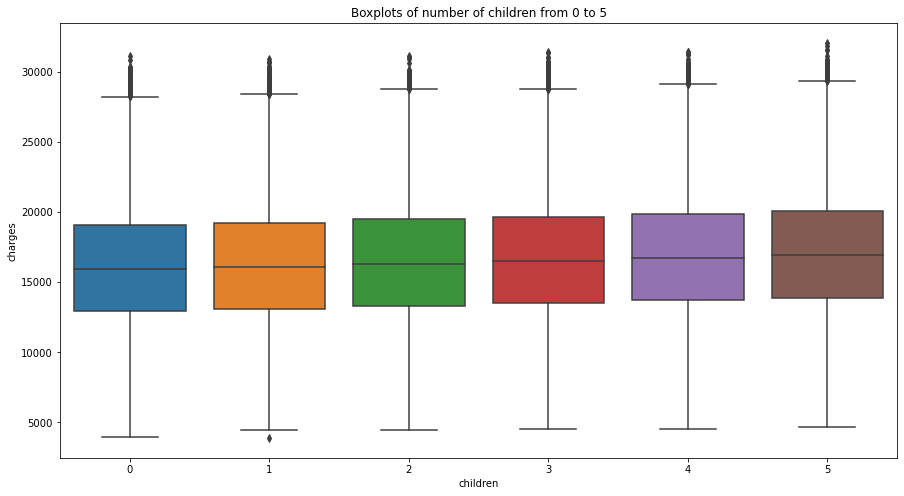

In [14]:
# Set figure size
plt.figure(figsize=(15, 8))

# boxplots of charges for number of children from 0 to 5
# charged the same regardless of number of children
sns.boxplot(x="children", y="charges", data=insurance_df)
plt.title("Boxplots of number of children from 0 to 5")
plt.show()

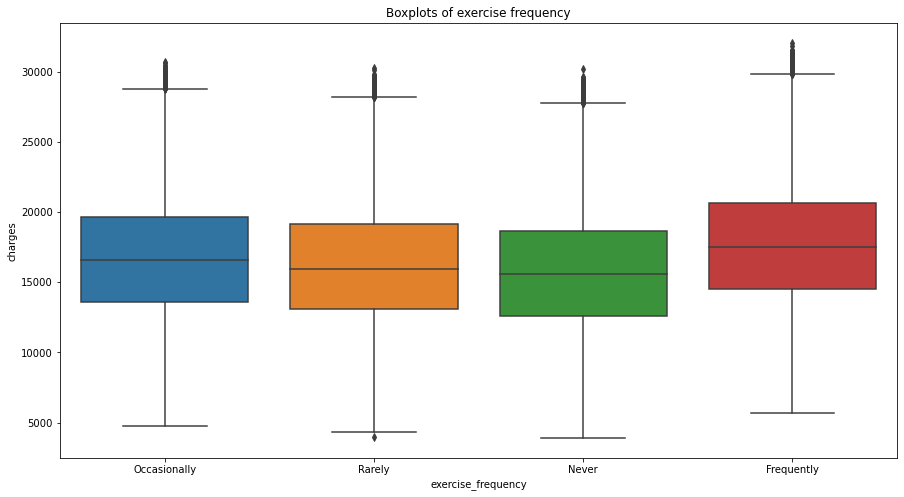

In [15]:
# Set figure size
plt.figure(figsize=(15, 8))

# boxplot of charges as a result of exercise frequency
# interesting you get charged more if you exercise more regurlarly
sns.boxplot(x="exercise_frequency", y="charges", data=insurance_df)
plt.title("Boxplots of exercise frequency")
plt.show()

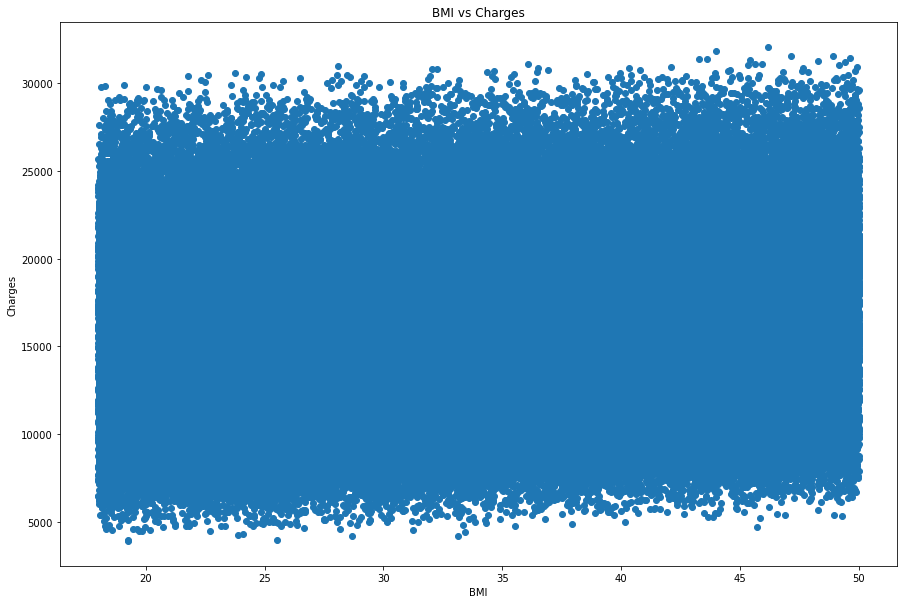

In [16]:
# Set figure size
plt.figure(figsize=(15, 10))

# Create scatterplot of BMI and charges
plt.scatter(insurance_df["bmi"], insurance_df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

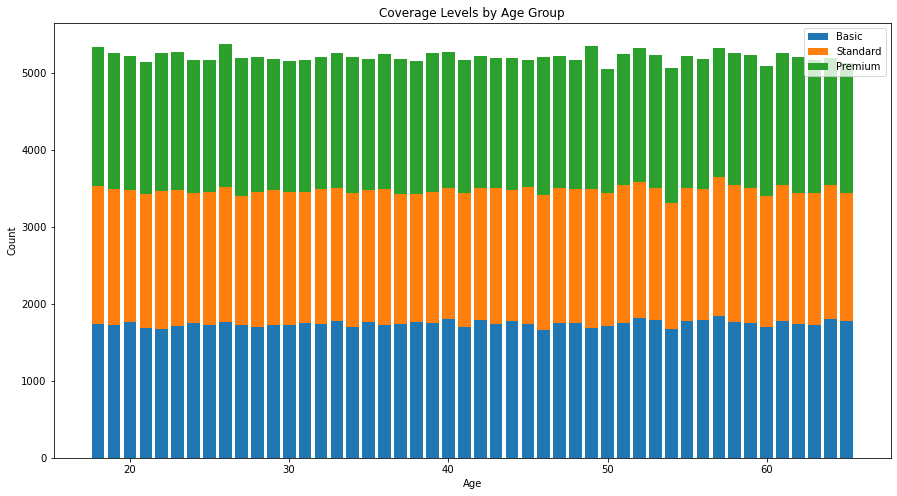

In [17]:
# Group data by age and coverage level
age_coverage = insurance_df.groupby(["age", "coverage_level"])["charges"].count().reset_index()

# Pivot data to create a table of counts by age and coverage level
age_coverage_pivot = age_coverage.pivot(index="age", columns="coverage_level", values="charges").fillna(0)

# stacked bar chart of coverage levels for different age groups
plt.figure(figsize=(15, 8))
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Basic"], label="Basic")
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Standard"], bottom=age_coverage_pivot["Basic"], label="Standard")
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Premium"], bottom=age_coverage_pivot["Basic"]+age_coverage_pivot["Standard"], label="Premium")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Coverage Levels by Age Group")
plt.legend()
plt.show()

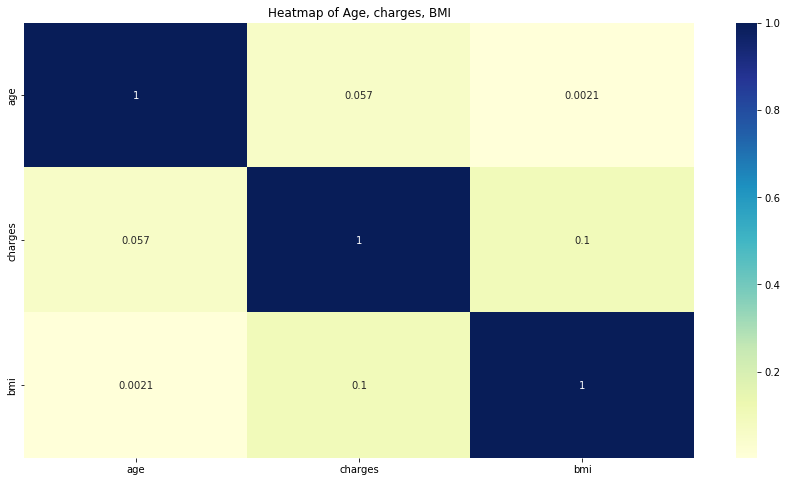

In [18]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create heatmap of age, charges, bmi
sns.heatmap(insurance_df[["age", "charges", "bmi"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap of Age, charges, BMI")
plt.show()

In [19]:
min_charges = insurance_raw_df.groupby(by=['coverage_level']).min()
min_charges['charges']

coverage_level
Basic       3445.011643
Premium     8700.511470
Standard    5543.845143
Name: charges, dtype: float64

In [20]:
round(min_charges['charges']/365, 2)

coverage_level
Basic        9.44
Premium     23.84
Standard    15.19
Name: charges, dtype: float64

In [21]:
max_charges = insurance_raw_df.groupby(by=['coverage_level']).max()
max_charges['charges']

coverage_level
Basic       27602.37687
Premium     32561.56037
Standard    29797.00654
Name: charges, dtype: float64

In [22]:
mean_charges = insurance_raw_df.groupby(by=['coverage_level']).mean()
mean_charges['charges']

coverage_level
Basic       14393.924079
Premium     19402.666240
Standard    16413.058442
Name: charges, dtype: float64

In [37]:
insurance_sample = insurance_raw_df[500:10000]
insurance_sample.groupby(by=['smoker', 'coverage_level']).count()

age  gender   bmi  children  region  medical_history  \
smoker coverage_level                                                          
no     Basic           1593    1593  1593      1593    1593             1593   
       Premium         1582    1582  1582      1582    1582             1582   
       Standard        1587    1587  1587      1587    1587             1587   
yes    Basic           1555    1555  1555      1555    1555             1555   
       Premium         1569    1569  1569      1569    1569             1569   
       Standard        1614    1614  1614      1614    1614             1614   

                       family_medical_history  exercise_frequency  occupation  \
smoker coverage_level                                                           
no     Basic                             1593                1593        1593   
       Premium                           1582                1582        1582   
       Standard                          1587                1587        1587   
yes    Basic                             1555                1555        1555   
       Premium                           1569                1569        1569   
       Standard                          1614                1614        1614   

                       charges  
smoker coverage_level           
no     Basic              1593  
       Premium            1582  
       Standard           1587  
yes    Basic              1555  
       Premium            1569  
       Standard           1614